In [60]:
%reset -f
%load_ext autoreload
%autoreload 2

import pandas as pd
import pca_helper as pca_helper
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA

data = pca_helper.load_data("data/BATADAL_dataset03.csv")
tdata, labels = pca_helper.pre_process(data,False)
data2 = pca_helper.load_data("data/BATADAL_dataset04.csv")
tdata2, labels2 = pca_helper.pre_process(data2,True)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
tdata.head()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,F_PU2,S_PU2,...,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
0,-1.801668,-0.842161,-1.489735,-1.437100,-0.125305,-0.302092,-2.099840,-0.191837,0.699708,0.6072,...,-0.488928,0.968475,-0.470930,0.195802,-1.257323,0.754447,-1.255191,-0.149604,-1.032124,-0.363355
1,-1.882432,-0.869352,-0.824341,-1.364756,0.514449,0.701151,-1.750272,-0.182138,0.702016,0.6072,...,-0.490217,1.186235,-0.473974,0.421522,-1.269177,0.771176,-1.266938,-0.139625,-1.039972,-0.375851
2,-1.959306,-0.885000,-0.090841,-0.577060,1.124164,0.730143,-1.274787,-0.249309,0.686032,0.6072,...,-0.488463,1.376247,-0.473960,0.512476,-1.099823,0.955458,-1.096348,0.846406,-1.039905,-0.375745
3,-1.948692,-0.869262,0.695223,0.326835,1.638064,0.730143,-0.119569,-0.333484,0.666001,0.6072,...,-0.454815,1.558041,-0.441443,0.704155,0.356598,-0.981428,0.351616,1.569917,-1.017362,-0.339848
4,-1.823477,-0.814892,1.527235,1.559097,1.029043,0.730143,1.371911,-0.355788,0.660693,0.6072,...,-0.399478,1.780077,-0.387166,1.024304,0.397696,-0.973794,0.392623,1.650446,-0.987991,-0.293079


In [58]:
tdata2.head()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,F_PU2,S_PU2,...,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
0,-0.221124,1.327657,-1.489124,0.998033,0.151721,0.741081,1.272798,-0.705623,0.575307,0.606764,...,0.180093,-1.109739,0.163175,0.422972,-0.612301,0.824104,-0.612983,0.704231,1.179237,0.071841
1,-0.039228,0.844757,-1.474446,1.144866,0.736189,0.403126,1.439856,-1.118676,0.475250,0.606764,...,-1.221813,0.982480,-1.212720,0.290987,1.111116,1.213368,1.125392,-1.467869,1.796704,-1.230930
2,0.332832,0.253036,-0.799237,1.199928,1.524541,-1.230321,-0.123326,-1.072672,0.486157,0.606764,...,-1.421050,1.166567,-1.413447,0.586633,1.119606,1.315176,1.133841,-1.691650,1.759743,-1.451169
3,0.754500,-0.168651,-0.050635,0.887909,1.103181,-2.187859,-1.101807,-1.246898,0.444190,0.606764,...,-0.276342,1.483999,-0.245579,-1.836604,1.491032,-1.019412,1.476025,0.759288,2.029341,-0.398500
4,1.134828,-0.413501,0.771359,-0.653829,0.491528,0.121498,0.163058,-1.353587,0.418346,0.606764,...,-0.395884,1.499339,-0.369665,-1.837924,1.639602,-1.021408,1.623882,0.800137,2.194579,-0.525418


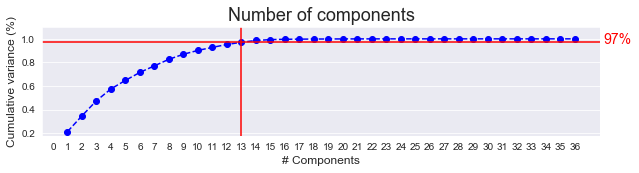

In [61]:
# To determine the number of components to use for PCA, we can define a threshold which the 
# combined variance of the highest number of components should satisfy. 
# To get 95% of the variance explained there are 12 components required, and in case of 99%
# we need 15 components.

pca_all = PCA(n_components=len(tdata.columns), random_state=33)
pca_all.fit_transform(tdata)

pca_helper.number_of_components_plot(pca_all, len(tdata.columns), 0.97);

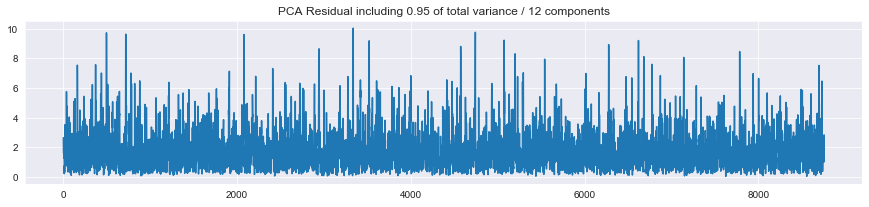

Total error of all components for variance 0.95:  14998.73637268196


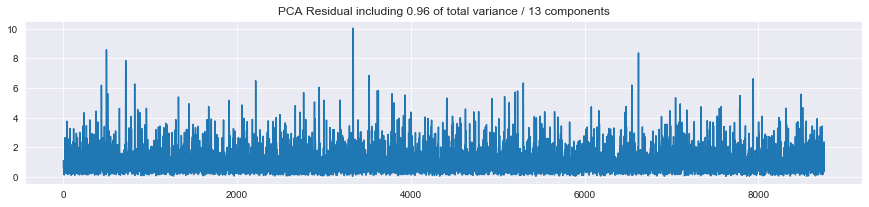

Total error of all components for variance 0.96:  24118.92420895173


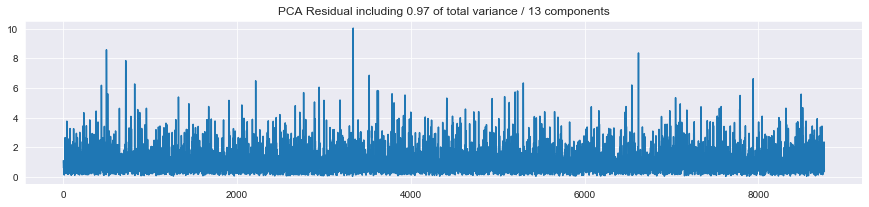

Total error of all components for variance 0.97:  33239.1120452215


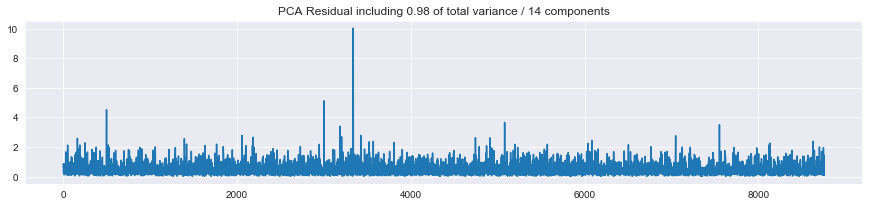

Total error of all components for variance 0.98:  37601.67576415043


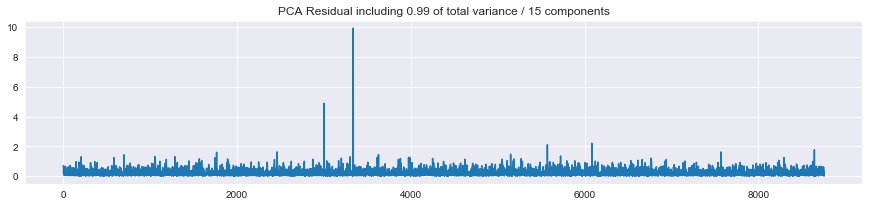

Total error of all components for variance 0.99:  39657.17796940825


In [62]:
variances = [0.95, 0.96, 0.97, 0.98, 0.99]
pca = list()
x = list()
components = list()
x_fitted = list()
error = list()
mean_data = list()
std_data = list()

for var in variances:
    pca.append(PCA(n_components=var, random_state=33))

for p in pca:
    index = pca.index(p)
    x.append(p.fit_transform(tdata))
    components.append(p.components_)
    x_fitted.append(np.matmul(x[index],components[index]))
    error.append(np.sum((tdata-x_fitted[index])**2,axis=1))
    
    plt.subplots(figsize=(15,3))
    plt.title('PCA Residual including '+str(variances[index])+' of total variance / '+str(len(components[index]))+' components')
    plt.plot(error[index])
    plt.show()
    print("Total error of all components for variance "+str(variances[index])+": ",np.sum(error))

In [63]:
# Detect and remove outliers from dataset
# Take confidence level of 99.73%. Only 7 attacks has been registered in the SCADA system, thus this looks quite the same in numbers
# If sample has any column that is out this level remove from dataset

mean = list()
std = list()
outliers = set()
columns = tdata.columns

for col in columns:
    mean.append(np.mean(tdata[col]))
    std.append(np.std(tdata[col]))
    
for i in range(len(tdata)):
    row = tdata.loc[i]
    
    for j in range(len(columns)):
        if row[columns[j]] < mean[j]-3*std[j] or row[columns[j]] > mean[j]+3*std[j]:
            outliers.add(i)

print("Outliers: ",len(outliers))

tdata_without_outliers = tdata.copy()
tdata_without_outliers.drop(outliers, inplace=True)

Outliers:  85


4317.246153900864


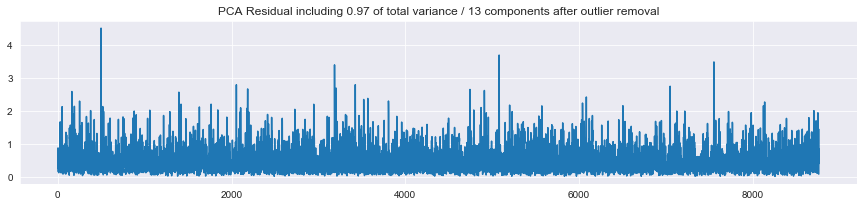

In [64]:
# New residual plot, 

pca_new = PCA(n_components=0.97, random_state=33)
x_new = pca_new.fit_transform(tdata_without_outliers)
components_new = pca_new.components_

x_fitted_new = np.matmul(x_new,components_new)

error_new = np.sum((tdata_without_outliers-x_fitted_new)**2,axis=1)

print(np.sum(error_new))

plt.subplots(figsize=(15,3))
plt.title('PCA Residual including 0.97 of total variance / 13 components after outlier removal')
plt.plot(error_new)
plt.show()

In [65]:
tdata_without_outliers.head()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,F_PU2,S_PU2,...,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
0,-1.801668,-0.842161,-1.489735,-1.437100,-0.125305,-0.302092,-2.099840,-0.191837,0.699708,0.6072,...,-0.488928,0.968475,-0.470930,0.195802,-1.257323,0.754447,-1.255191,-0.149604,-1.032124,-0.363355
1,-1.882432,-0.869352,-0.824341,-1.364756,0.514449,0.701151,-1.750272,-0.182138,0.702016,0.6072,...,-0.490217,1.186235,-0.473974,0.421522,-1.269177,0.771176,-1.266938,-0.139625,-1.039972,-0.375851
2,-1.959306,-0.885000,-0.090841,-0.577060,1.124164,0.730143,-1.274787,-0.249309,0.686032,0.6072,...,-0.488463,1.376247,-0.473960,0.512476,-1.099823,0.955458,-1.096348,0.846406,-1.039905,-0.375745
3,-1.948692,-0.869262,0.695223,0.326835,1.638064,0.730143,-0.119569,-0.333484,0.666001,0.6072,...,-0.454815,1.558041,-0.441443,0.704155,0.356598,-0.981428,0.351616,1.569917,-1.017362,-0.339848
4,-1.823477,-0.814892,1.527235,1.559097,1.029043,0.730143,1.371911,-0.355788,0.660693,0.6072,...,-0.399478,1.780077,-0.387166,1.024304,0.397696,-0.973794,0.392623,1.650446,-0.987991,-0.293079


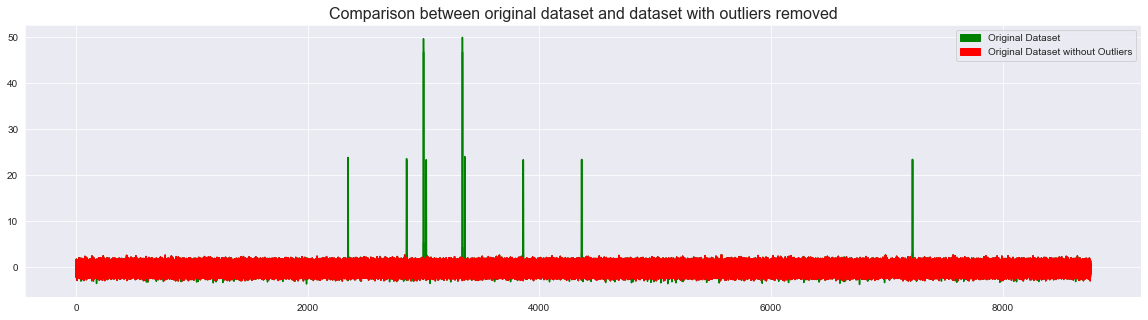

In [66]:
f, ax = plt.subplots(figsize=(20,5))
ax.plot(tdata, color='green');
ax.plot(tdata_without_outliers, color='red');

label_original = matplotlib.patches.Patch(color='green', label='Original Dataset')
label_without_outliers = matplotlib.patches.Patch(color='red', label='Original Dataset without Outliers')
plt.legend(loc='upper right', handles=[label_original, label_without_outliers]);
plt.title("Comparison between original dataset and dataset with outliers removed",size=16);

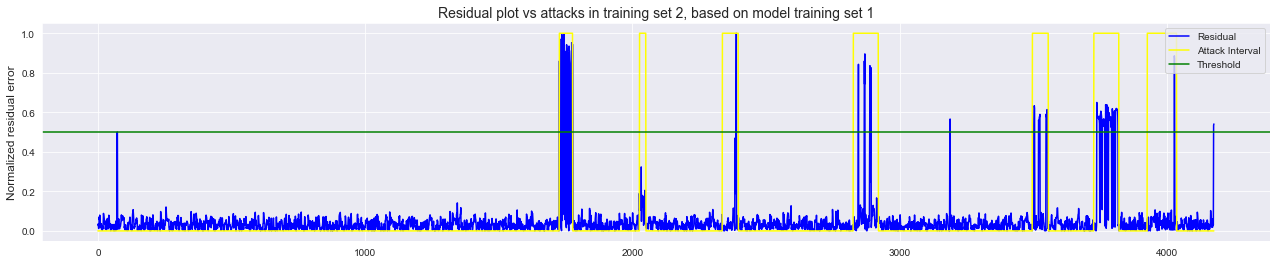

Accuracy: 0.9104620541058176
Precision: 0.9609375
Recall: 0.25
TP: 123
FP: 5
FN: 369
TN: 3680


In [249]:
# Apply the trained model from the first dataset to the second training dataset.
# For this dataset the actual attacks are known, and can thus be used verify results.
# Compute the (normalized) residual
transformed_data = pd.DataFrame(pca_new.transform(tdata2), tdata2.index)
inverse_data = pd.DataFrame(pca_new.inverse_transform(transformed_data), pca_training_2.index, columns=tdata2.columns)
residual = np.abs(np.sum(tdata2-inverse_data,axis=1))
residual = residual/max(residual)

# Find the optimal threshold by plotting all elements.
# We want a high number of TP correspondig with a low FP => high precision
# Pre-calculated optimum at index 448, or 0.5010854719373081 in value
plot_metric_results = False
if plot_metric_results == True:
    pca_helper.plot_threshold_search(residual, labels2)

# Predict labels for threshold
threshold = 0.5010854719373081
labels_pred = pca_helper.predict_labels(residual,threshold)
    
# Plot the result with the computed threshold
f,ax = plt.subplots(figsize=(22,4))
plt.plot(residual, label='Residual', color='blue')
plt.plot(labels2,label='Attack Interval', color='yellow')
plt.axhline(threshold, color='green', label='Threshold')
ax.set_title("Residual plot vs attacks in training set 2, based on model training set 1",size=14)
ax.set_ylabel("Normalized residual error",size=12)
plt.legend(loc='upper right')
plt.show()

# Evaluate the performance of the anomaly detection
pca_helper.performance(labels2,labels_pred)

In [163]:
np.where(labels_pred==1)

(array([  72,   73, 1727, 1731, 1732, 1736, 1739, 1741, 1742, 1743, 1744,
       1745, 1746, 1748, 1749, 1750, 1751, 1754, 1755, 1758, 1759, 1760,
       1763, 1764, 1765, 1766, 1767, 1773, 1774, 1775, 1776, 1777, 2026,
       2030, 2031, 2032, 2033, 2037, 2040, 2047, 2384, 2385, 2386, 2387,
       2388, 2389, 2845, 2846, 2868, 2869, 2870, 2888, 2889, 2890, 2891,
       2892, 2893, 3188, 3189, 3503, 3504, 3505, 3520, 3521, 3522, 3523,
       3524, 3525, 3548, 3549, 3550, 3551, 3552, 3553, 3738, 3739, 3740,
       3741, 3742, 3743, 3744, 3745, 3746, 3747, 3748, 3751, 3752, 3753,
       3754, 3755, 3756, 3757, 3759, 3760, 3761, 3762, 3763, 3764, 3765,
       3766, 3767, 3768, 3771, 3772, 3775, 3776, 3777, 3778, 3779, 3780,
       3782, 3783, 3784, 3785, 3786, 3787, 3788, 3789, 3790, 3791, 3792,
       3793, 3796, 3797, 3800, 3801, 3802, 3803, 3804, 3805, 3808, 3809,
       3810, 3811, 3812, 3813, 3814, 3815, 3816, 3817, 4028, 4029, 4175,
       4176]),)


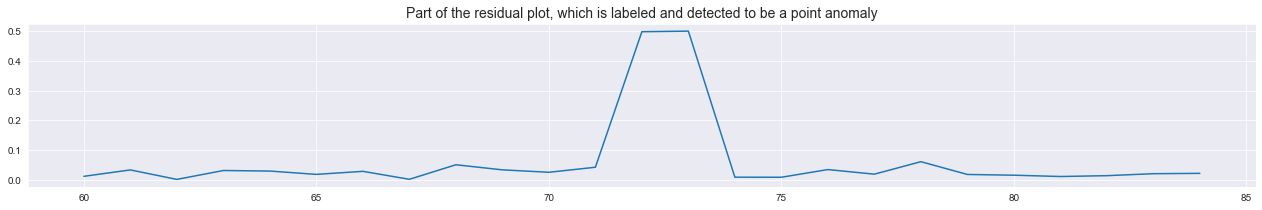

In [266]:
pca_helper.plot_anomaly_range(residual,60,85,'point')

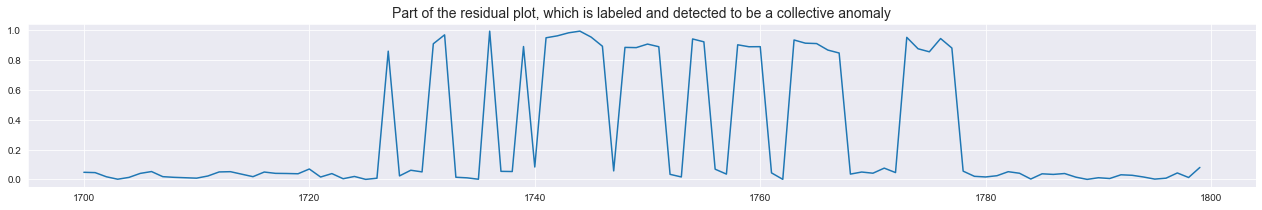

In [267]:
pca_helper.plot_anomaly_range(residual,1700,1800,'collective')

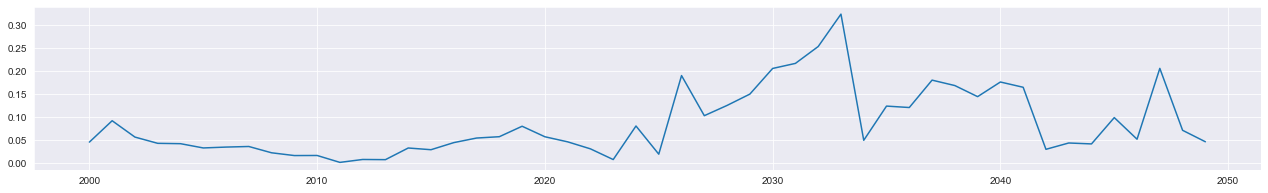

In [166]:
f,ax = plt.subplots(figsize=(22,3))
plt.plot(residual[2000:2050])

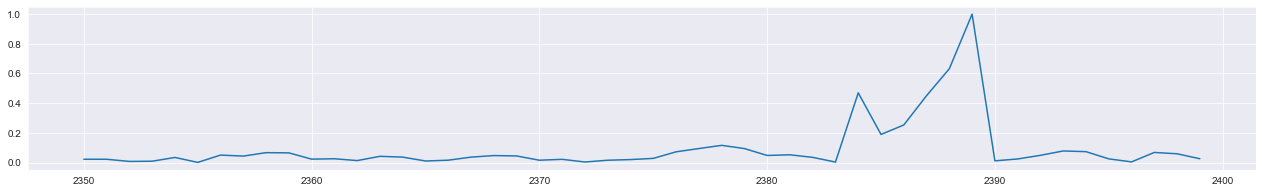

In [167]:
f,ax = plt.subplots(figsize=(22,3))
plt.plot(residual[2350:2400])